# Importing Dependencies 

In [1]:
import cv2
import matplotlib.pyplot as plt

# Deepface module 

In [2]:
!pip install deepface

  Using cached deepface-0.0.79-py3-none-any.whl (49 kB)
  Using cached mtcnn-0.1.1-py3-none-any.whl (2.3 MB)
  Using cached fire-0.5.0-py2.py3-none-any.whl
  Using cached gunicorn-20.1.0-py3-none-any.whl (79 kB)
  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


In [3]:
from deepface import DeepFace

# Sample Image and output of the image 

In [4]:
img = cv2.imread("Sundar pichai.jpg")

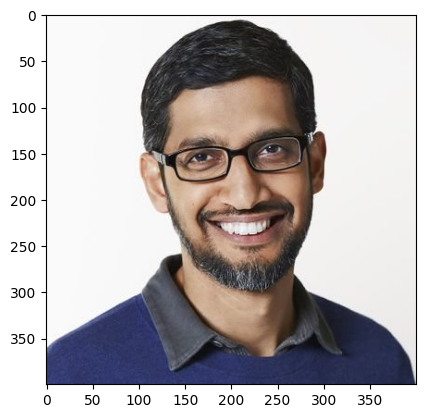

In [5]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Analysing emotions using DeepFace 

In [6]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.99s/it]


In [7]:
predictions

[{'emotion': {'angry': 1.5070495962277164e-06,
   'disgust': 9.923935901687e-18,
   'fear': 8.101691192918814e-10,
   'happy': 99.99997615814209,
   'sad': 3.881177601527952e-08,
   'surprise': 1.349019772842533e-11,
   'neutral': 2.2257175658069173e-05},
  'dominant_emotion': 'happy',
  'region': {'x': 95, 'y': 70, 'w': 222, 'h': 222},
  'age': 35,
  'gender': {'Woman': 0.00045017322918283753, 'Man': 99.9995470046997},
  'dominant_gender': 'Man',
  'race': {'asian': 0.7134194951504469,
   'indian': 53.6848247051239,
   'black': 0.993126630783081,
   'white': 6.941302120685577,
   'middle eastern': 15.811097621917725,
   'latino hispanic': 21.85623198747635},
  'dominant_race': 'indian'}]

In [10]:
dominant_emotion = predictions[0]['dominant_emotion']

In [11]:
dominant_emotion

'happy'

# Detect the face using the Cascade classifier 

In [12]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [13]:
faces = faceCascade.detectMultiScale(img,1.3,3)

for(x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),5)

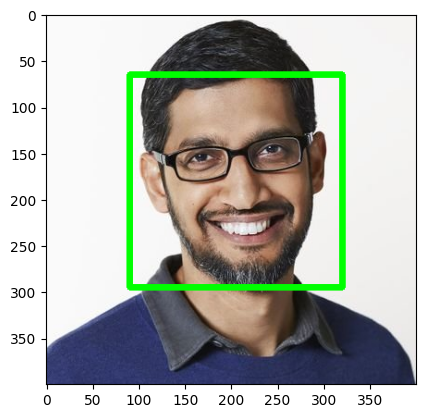

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

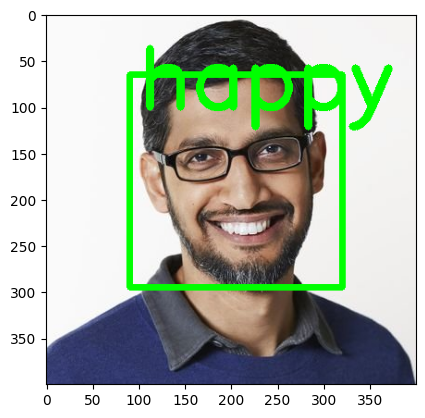

In [16]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, dominant_emotion,(100,100),font,3,(0,255,0),8,cv2.LINE_4)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Driver code 

In [17]:
import cv2
import matplotlib.pyplot as plt

from deepface import DeepFace


faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

emotions = []

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    results = DeepFace.analyze(frame, actions = ['emotion'], enforce_detection=False)
    
    
    
    try:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        faces = faceCascade.detectMultiScale(gray,1.3,3)
        for(x,y,w,h) in faces:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0),5)
        
        cv2.rectangle(frame, (0,0),(100,30),(0,0,0),-1)
        cv2.putText(frame, results[0]['dominant_emotion'],(20,20),cv2.FONT_HERSHEY_COMPLEX ,0.5,(0,0,255),2,cv2.LINE_AA)
        
        '''cv2.rectangle(frame, (0,50),(100,100),(255,255,255),-1)
        cv2.putText(frame,append,(5,90),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0),2,cv2.LINE_AA)'''
        
    
    except:
        print('a')
    
    cv2.imshow('Emotion tracker', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.97it/s]


In [19]:
print(results)

[{'emotion': {'angry': 3.275811832079492e-12, 'disgust': 7.931635867911684e-25, 'fear': 0.30679586343467236, 'happy': 7.329224553103241e-15, 'sad': 84.35181975364685, 'surprise': 6.131495999947209e-12, 'neutral': 15.341389179229736}, 'dominant_emotion': 'sad', 'region': {'x': 0, 'y': 0, 'w': 640, 'h': 480}}]
